# Review for Lecture on 13/06/2017 
---

## General remarks: 
---
We will learn about 
  - Elements of a good data visualisation: What makes 
  - Tools available:
    - Python is great! 
    - Matplotlib: The grandfather of most other tools in python. 
    - Numpy: Essential for numerical calculations. 
    - Pandas: provides data storage types such as "DataFrame" (think Pythonic Excel) and "Series" together with tools to manipulate them. 
    - Seaborn: Great for early stage data explorations. 
    - Bokeh, Plotly: interactivity and online tools
    - ...
  - One of the important thing you should learn: How to find and understand the tools you need for your visualisation task. Some useful references for tool in python include
     - Pandas documentation and cookbook: http://pandas.pydata.org/pandas-docs/stable/
     - Matplotlib documentation, gallery: http://matplotlib.org/
     - ... Google will get you there. Read widely and actively to visualisation task to know the keywords to search. Good foundation in algorithmic thinking and knowledge about Python help. 

  
Regarding Data visualisation itself:
  
  - It is a process. 
     - **Exploration**: Analyse your dataset with an open mind. You never know if your assumptions or biases are correct. 
     - **Exposition**. Pin down what you want to inform your audience and then
     - **Design**: think about what is the best way to present them. 
  - Don't make your presentation looks "busy", be aware of your *data-to-ink ratio*. Make sure each element you add into your visualisation serves a purpose and serves it well. 
  - Beware of summary statistics, they can be misleading. Check for outliars. Do a scatter plot, it reveals more structure in the data than summary statistics can. 
  - Encodings (various forms information)
    - numbers and strings (but humans don't process these well, they are for machines)
    - Positions (points in 1, 2 or 3 dimensional space, height, width) 
    - Colours (grey scale, RGB, HLS, HSV, contrasts)  
    - Shape
    - Kinetics (movements or what the brain will intepret as movement) 
    - ...


---
## Running Python for data visualisation
--- 
*Do ask me if you have any issues / questions regarding installing Miniconda and setting up the `dataviz` environment.* 

There are various ways to work with Python. For the purpose of data analysis, here are some popular ones: 

  - Spyder
  - IPython 
  - Jupyter (you're looking at one)

It is highly recommended to develop your code in a controlled "Python environment", i.e. a separate Python interpreter, libraries / packages for each project. This ensure that you know what packages were needed for the project and avoiding polluting the working environment of other projects. `Anaconda` (and `Miniconda` you downloaded in lecture) is serves this purpose as well as providing convenient ways to download the packages you required in a few keystrokes. In lecture, you created the `dataviz` environment using the specification given by `dataviz.yml` which gives you access to standard data analytic packages such as `pandas`, `seaborn`, `numpy`, `scipy` ... When you *activate* the `dataviz` environment using the command ``source activate dataviz``, you have now access to these packages and any modifications will be contained in this environment only. 

---
## On Tidy Data
---
Reference: http://vita.had.co.nz/papers/tidy-data.pdf (by Hadley Wickham)  
80% (so it is said) of data analytic effort goes into tidying up raw data into a form suitable for explorations, analysis, visualisation, etc ... "Tidy data" is about adhering, whenever possible, to a standard or convention of data organisation that link structure of data (for our purpose: rows and columns) to its meaning (variables or observations). 

With the mantra that "all tidy data are alike" (that's why its a standard), we require that tidy data

  - Columns are variables
  - Rows are observations
  - Different tables for different observation unit
Advantage? 

  - It provides a uniform way of thinking and talking about data. 
    - You can talk about "rows" and others will know you're taking about the individual observations. "That is large dataset!" translate to "the data have a lot of rows" which translate to "the data has a lot of observations". Similarly, "this dataset is tall", "that's too many columns!" only make sense when we know what conventions we adhere to.
  - Standard data analysis tools often assume tidy data format. And the code you wrote on your own to analyse the data will be easier to follow if you conform to tidy data convention. 
    - e.g. seaborn.boxplot(data=data) produce a boxplot for each column since it assumes each column corresponds to a variable of interest.





----
#### Notes
----
You might want to be ready to do a simple tidy data example to reinforce their knowledge, and if time permits, a strip/jitter/swarm plot as well.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns #.apionly preserves prevents seaborn overriding matplotlib styles.

# This command tells Jupyter notebook to always display plots as "inline output". 
%matplotlib inline 

---
## Some data tidying
---
Below shows some examples of how I will read the datasets provided in `mbs-datasets` into a Pandas dataframe. I will convert the into tidy form if they are not already in that form. 

These aren't the only correct ways to do it. Some decisions (such as what do use as index columns, what rows to skip) are context dependent and sometimes a matter of style. 


#### Notes:
 
  - A convention that I adopted is to name variables that refer to a ` Pandas.DataFrame ` object with a ` _df ` suffix. 
  - Each of these takes a few trials. You first read in the dataset naively and see what modification you can do to it. To understand the code, it is highly recommended that you try it yourself before you look at what I have done. Do tell me if you strongly disagree with what I have done. 
  - Read (just roughly) documentation of these parsers (e.g. `read_csv`, `read_excel`). 

---

#### Data: `gapminder-health-income.csv`
- The parser will automatically infer that the first row in the file is a header. 
- We manually specify that we only want the columns with index 1 to 4 (i.e. skip the first column). 
- Of these columns the first one (index 0 in the chosen columns, index 1 in the original file) is chosen as the index column
- This is a tidy data.

In [2]:
health_income_df = pd.read_csv("./mbs-datasets/gapminder-health-income.csv", usecols=range(1, 5), index_col=0)
# uncomment the row bellow to see result
#health_income_df  

#### Data: `air-quality-exposure.csv`
- Skipped the first row in the file since I consider it a "meta-data". It gives information about what the numbers means. There are various ways to handle this including: recording it some where in your code (e.g. variable name), or you can manually change your dataframe's header to incorporate that information. 
- There are missing data which is noted in the file as `No data`. We can alert the parser about this using the `na_values=` option. If missing data is denoted in more than one ways (e.g. `No data`, `no data`, `null`, `<empty>`), we should alert the parser about all of them so that missing data can be treated uniformly during analysis. 
- Otherwise, this is a tidy data.

In [71]:
air_quality_exposure_2014_df = pd.read_csv("./mbs-datasets/air-quality-exposure.csv", 
                                           skiprows=2, 
                                           index_col=0, 
                                           na_values=['No data'])
#air_quality_exposure_2014_df

---
### Data Tidying Examples
---

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


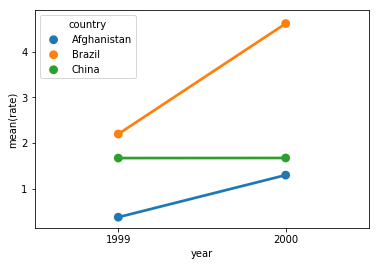

In [142]:
table1 = pd.read_csv('./mbs-datasets/tidy/table1.csv')
table1['rate'] = (table1['cases'] /
                  table1['population'] * 10**4)
                  
table1.groupby('year').sum()['cases']
sns.pointplot(x='year', y='rate', hue='country',
              data=table1)
table1

In [95]:
table2.pivot_table(index=['year', 'country'], columns='type', values='count')

type               cases  population
year country                        
1999 Afghanistan     745    19987071
     Brazil        37737   172006362
     China        212258  1272915272
2000 Afghanistan    2666    20595360
     Brazil        80488   174504898
     China        213766  1280428583

In [127]:
table2 = pd.read_csv('./mbs-datasets/tidy/table2.csv')
print(table2)
table2.pivot_table(index=('year', 'country'), values='count', columns='type')

        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
3   Afghanistan  2000  population    20595360
4        Brazil  1999       cases       37737
5        Brazil  1999  population   172006362
6        Brazil  2000       cases       80488
7        Brazil  2000  population   174504898
8         China  1999       cases      212258
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583


type               cases  population
year country                        
1999 Afghanistan     745    19987071
     Brazil        37737   172006362
     China        212258  1272915272
2000 Afghanistan    2666    20595360
     Brazil        80488   174504898
     China        213766  1280428583

In [ ]:

table3 = pd.read_csv('./mbs-datasets/tidy/table3.csv')
table4a = pd.read_csv('./mbs-datasets/tidy/table4a.csv')
table4b = pd.read_csv('./mbs-datasets/tidy/table4b.csv')


        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
3   Afghanistan  2000  population    20595360
4        Brazil  1999       cases       37737
5        Brazil  1999  population   172006362
6        Brazil  2000       cases       80488
7        Brazil  2000  population   174504898
8         China  1999       cases      212258
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583


count            
type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

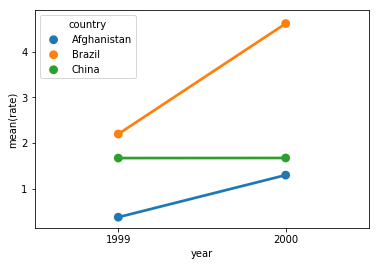

In [16]:


print(table2)

table2.pivot_table(values=['count'],
                 index=('country', 'year'),
                 columns=['type'])

---
## Strip plot / Swarm plot
---
Data: `channel-intensities.csv'  


In [16]:
df = pd.DataFrame({"name": ["A", "B", "C"], "Q1": [1, 2, 3], "Q2": [4, 5, 6]})
print(df)
df_long = df.melt(id_vars=["name"], var_name='Quiz Num', value_name='Quiz Score')
df_long

   Q1  Q2 name
0   1   4    A
1   2   5    B
2   3   6    C


,name,Quiz Num,Quiz Score
0,A,Q1,1
1,B,Q1,2
2,C,Q1,3
3,A,Q2,4
4,B,Q2,5
5,C,Q2,6


In [15]:
df_long.pivot_table(index='name', columns='Quiz Num', values='Quiz Score')

Quiz Num,Q1,Q2
name,,
A,1,4
B,2,5
C,3,6


Before tidying ... 

                                  filename       green        red      class
0  20170524 GFP S404ATRF1 TELcenpB -01.tif   29.652738  36.168458  S404ATRF1
1  20170524 GFP S404ATRF1 TELcenpB -02.tif   92.272702  57.936999  S404ATRF1
2  20170524 GFP S404ATRF1 TELcenpB -03.tif  107.054840  52.005616  S404ATRF1
3  20170524 GFP S404ATRF1 TELcenpB -04.tif   89.105632  53.957316  S404ATRF1
4  20170524 GFP S404ATRF1 TELcenpB -05.tif   78.837595  65.192988  S404ATRF1

 After tidying ... 

                                  filename      class channel  intensity
0  20170524 GFP S404ATRF1 TELcenpB -01.tif  S404ATRF1     red  36.168458
1  20170524 GFP S404ATRF1 TELcenpB -02.tif  S404ATRF1     red  57.936999
2  20170524 GFP S404ATRF1 TELcenpB -03.tif  S404ATRF1     red  52.005616
3  20170524 GFP S404ATRF1 TELcenpB -04.tif  S404ATRF1     red  53.957316
4  20170524 GFP S404ATRF1 TELcenpB -05.tif  S404ATRF1     red  65.192988


NameError: name 'cint_tidy' is not defined

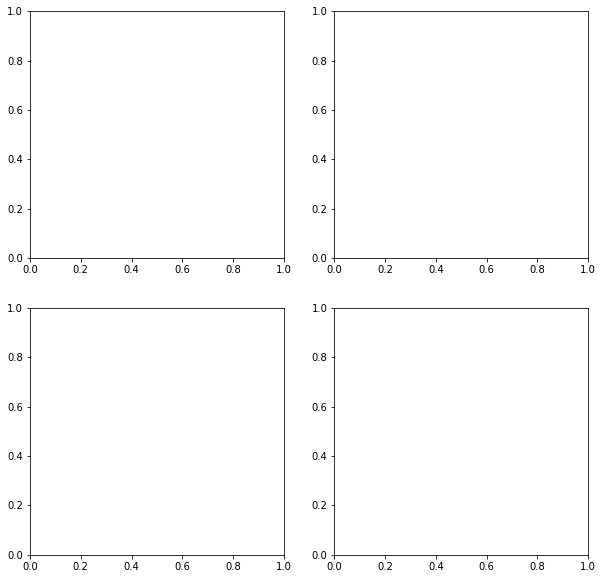

In [4]:
color_int_df = pd.read_csv('./mbs-datasets/channel-intensities.csv')
color_int_df['class'] = color_int_df['filename'].apply(lambda fn: fn.split()[2])
print("Before tidying ... \n")
print(color_int_df.head())
color_int_tidy_df = pd.melt(color_int_df, id_vars=['filename', 'class'],
                            var_name='channel',
                            value_vars=['red', 'green'],
                            value_name='intensity')

print("\n After tidying ... \n")
print(color_int_tidy_df.head())


# This will produce a figure with 4 axes arrange in 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 

sns.stripplot(x='class', y='intensity', hue='channel', ax = axes[0][0],
              data=cint_tidy)
sns.boxplot(x='class', y='intensity', hue='channel', ax = axes[0][0], data=cint_tidy)
axes[0][0].set_title("Strip plot (no jitter, no split)")
sns.swarmplot(x='class', y='intensity', hue='channel', ax = axes[0][1],
              data=cint_tidy)
axes[0][1].set_title("Swarm plot")
sns.stripplot(x='class', y='intensity', hue='channel', ax = axes[1][0],
              data=cint_tidy, jitter=True)
axes[1][0].set_title("Strip plot (jitter but no split)")
sns.stripplot(x='class', y='intensity', hue='channel',ax = axes[1][1],
              data=cint_tidy, jitter=True, split=True)
axes[1][1].set_title("Strip plot (jitter and split)")


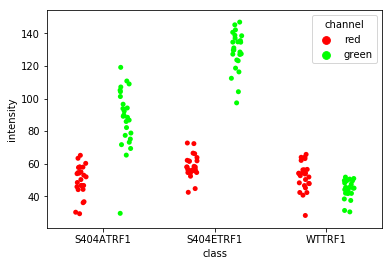

In [105]:
green = (0.0, 1.0, 0.0)
red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
palette = {'green': green, 'red': red, 'blue': blue}
sns.stripplot(x='class', y='intensity', hue='channel',
              data=cint_tidy, jitter=True, split=True,
              palette=palette)
